In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Read the dataset to python environment

In [53]:
iris1=pd.read_excel('/content/iris.xls')

In [54]:
iris=iris1.copy()
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
iris.shape

(150, 5)

In [56]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [57]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


MISSING VALUE HANDLING

In [58]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<Axes: xlabel='SL', ylabel='Count'>

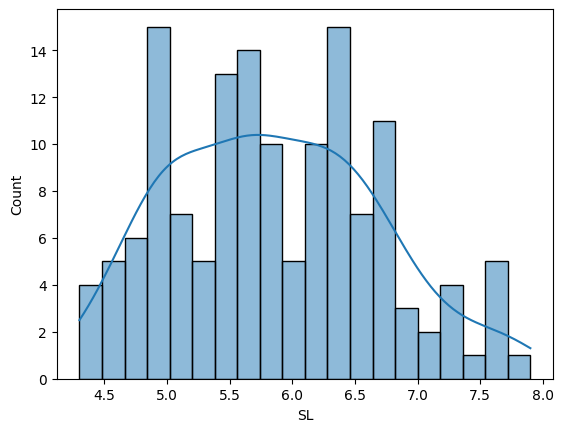

In [59]:
sns.histplot(iris['SL'],bins=20,kde=True)

In [60]:
iris['SL']=iris['SL'].fillna(iris['SL'].mean())
iris.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<Axes: xlabel='SW', ylabel='Count'>

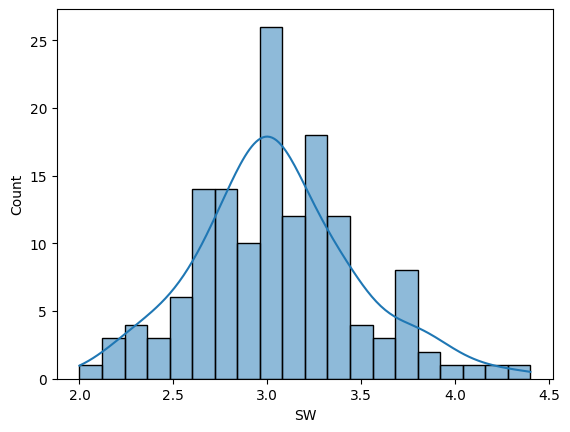

In [61]:
sns.histplot(iris['SW'],bins=20,kde=True)

In [62]:
iris['SW']=iris['SW'].fillna(iris['SW'].mean())

In [63]:
iris.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

<Axes: xlabel='PL', ylabel='Count'>

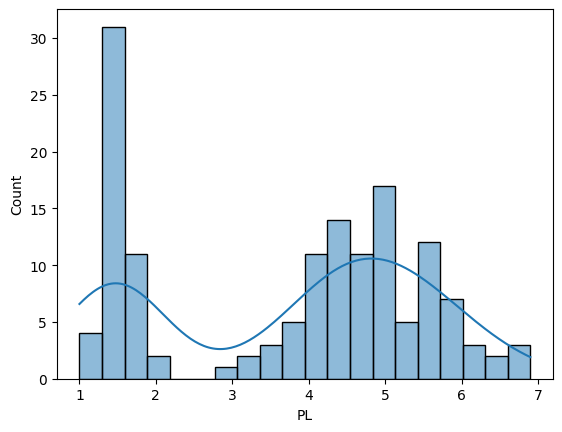

In [64]:
sns.histplot(iris['PL'],bins=20,kde=True)

In [65]:
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [66]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## OUTLIER'S HANDLING

<Axes: ylabel='SL'>

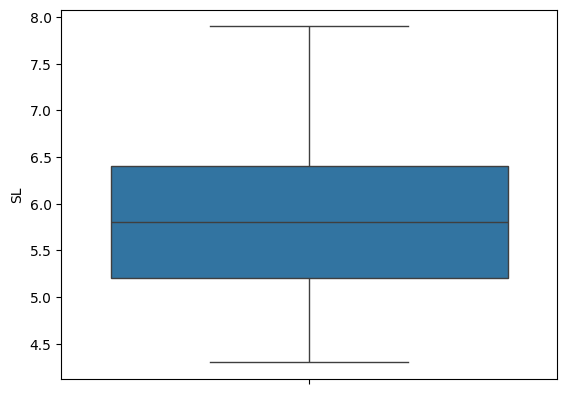

In [67]:
sns.boxplot(iris['SL'])

<Axes: ylabel='SW'>

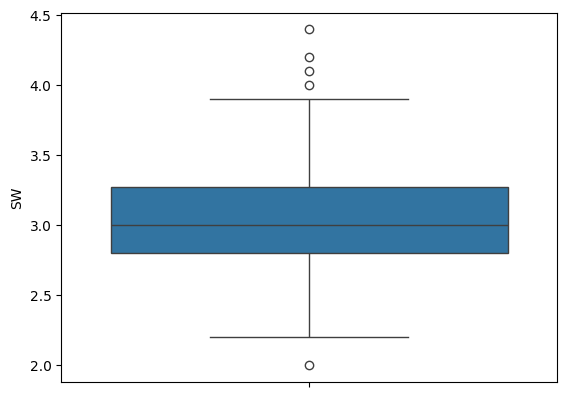

In [68]:
sns.boxplot(iris['SW'])

In [69]:
Q1 = np.percentile(iris['SW'],25,method='midpoint')
Q2 = np.percentile(iris['SW'],50,method='midpoint')
Q3 = np.percentile(iris['SW'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  2.8
Q2 is:  3.0
Q3 is:  3.25


In [70]:
IQR = Q3-Q1
print(IQR)

0.4500000000000002


In [71]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)

lower whisker:  2.1249999999999996
upper whisker:  3.9250000000000003


In [72]:
outlier =[]
for x in iris['SW']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [73]:
iris['SW']=iris['SW'].clip(lower=low_lim,upper=up_lim)

In [74]:
outlier =[]
for x in iris['SW']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[]


<Axes: ylabel='SW'>

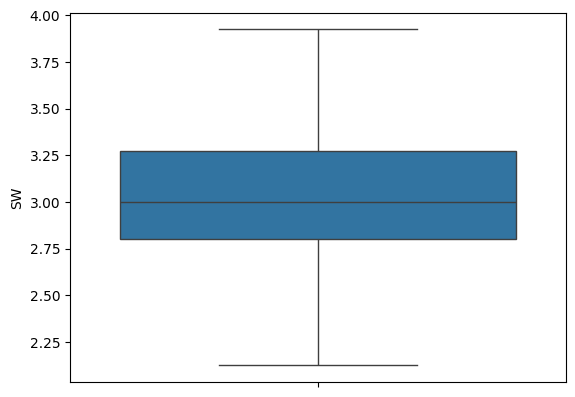

In [75]:
sns.boxplot(iris['SW'])

<Axes: ylabel='PL'>

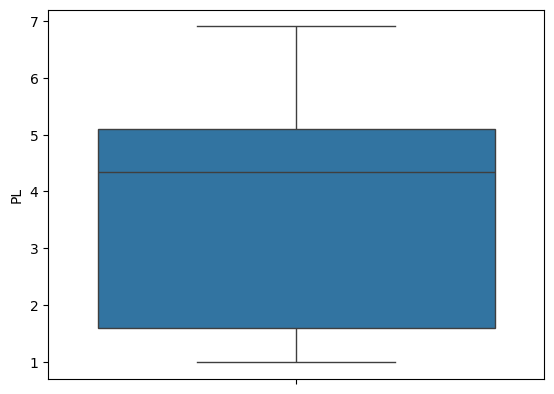

In [76]:
sns.boxplot(iris['PL'])

<Axes: ylabel='PW'>

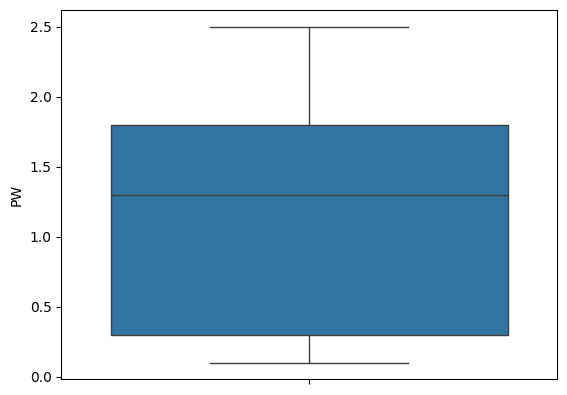

In [77]:
sns.boxplot(iris['PW'])

In [78]:
iris['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## SCALING

In [79]:
y = iris['Classification']
X = iris.drop(['Classification'],axis=1)

In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=56,test_size=0.2)

In [81]:
X_train.shape

(120, 4)

In [82]:
X_test.shape

(30, 4)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **LogisticRegression**



In [84]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [85]:
y_test

137     Iris-virginica
98     Iris-versicolor
77     Iris-versicolor
141     Iris-virginica
120     Iris-virginica
145     Iris-virginica
146     Iris-virginica
35         Iris-setosa
12         Iris-setosa
127     Iris-virginica
71     Iris-versicolor
4          Iris-setosa
0          Iris-setosa
18         Iris-setosa
83     Iris-versicolor
6          Iris-setosa
7          Iris-setosa
9          Iris-setosa
103     Iris-virginica
81     Iris-versicolor
42         Iris-setosa
108     Iris-virginica
57     Iris-versicolor
68     Iris-versicolor
30         Iris-setosa
104     Iris-virginica
105     Iris-virginica
63     Iris-versicolor
73     Iris-versicolor
53     Iris-versicolor
Name: Classification, dtype: object

In [86]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('F1 Score is', f1_score(y_test, y_pred,average='weighted'))


Accuracy is 0.9333333333333333
Precision is 0.9444444444444445
Recall is 0.9333333333333333
F1 Score is 0.9326599326599326


In [87]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]])

## **KNN CLASSIFIER**

In [88]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.8666666666666667,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

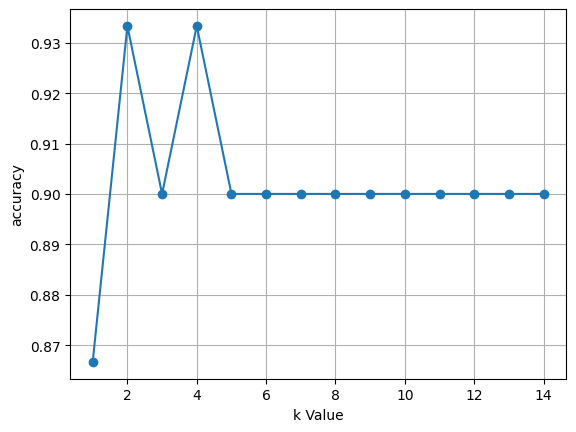

In [89]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [90]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='weighted'))
print('Recall is', recall_score(y_test, y_pred_knn,average='weighted'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='weighted'))

Accuracy is 0.9
Precision is 0.9230769230769231
Recall is 0.9
F1 Score is 0.8976982097186702


# **Support Vector Machine**

In [92]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [102]:
print(confusion_matrix(y_test,y_svm_prediction))


[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


In [103]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))
print('Precision is', precision_score(y_test,y_svm_prediction,average='weighted'))
print('Recall is', recall_score(y_test,y_svm_prediction,average='weighted'))
print('F1 Score is', f1_score(y_test,y_svm_prediction,average='weighted'))

accuracy score 0.9
Precision is 0.9230769230769231
Recall is 0.9
F1 Score is 0.8976982097186702


# **Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier
ds_clf= DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [104]:
y_pred_dt = ds_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
print("accuracy score",accuracy_score(y_test,y_pred_dt))
print('Precision is', precision_score(y_test,y_pred_dt,average='weighted'))
print('Recall is', recall_score(y_test,y_pred_dt,average='weighted'))
print('F1 Score is', f1_score(y_test,y_pred_dt,average='weighted'))


[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
accuracy score 0.9333333333333333
Precision is 0.9444444444444445
Recall is 0.9333333333333333
F1 Score is 0.9326599326599326


# **Random Forest Classifier**

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_pred_rf = rf_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print("accuracy score",accuracy_score(y_test,y_pred_rf))
print('Precision is', precision_score(y_test,y_pred_rf,average='weighted'))
print('Recall is', recall_score(y_test,y_pred_rf,average='weighted'))
print('F1 Score is', f1_score(y_test,y_pred_rf,average='weighted'))

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
accuracy score 0.9333333333333333
Precision is 0.9444444444444445
Recall is 0.9333333333333333
F1 Score is 0.9326599326599326


**The Random Forest Classifier,DecisionTreeClassifier and LogisticRegression are giving the best results**